# Импорт библиотек и загрузка датасета

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina' # для более четкой отрисовки графиков

In [2]:
# датасет вязт с https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones
ds = pd.read_csv('activity_train.csv') # Загружаем датасет
print('Размерность датасета: {}'.format(ds.shape))

Размерность датасета: (7352, 563)


Посмтотрим как выглядит датасет:

In [3]:
ds.head() 

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
ds['Activity'].value_counts() # целевая переменная имеет 6 разных значений

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [5]:
x, y = ds.drop(['Activity', 'subject'], axis=1), ds['Activity'] # разделим датасет на X и y(целевой признак)
print('Размерность x: {}, размерность y: {}'.format(x.shape, y.shape))

Размерность x: (7352, 561), размерность y: (7352,)


In [6]:
print('Минимальное значение признака в датасете: {}, \
максимальное значение признака в датасете: {} '.format(x.min().min(), x.max().max()))

Минимальное значение признака в датасете: -1.0, максимальное значение признака в датасете: 1.0 


# PCA

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Первый вариант реализации PCA в библиотеке sklearn это напрямую указать кол-во признаков до которых мы хотим понизить размерность, указав параметр n_components > 1:

In [8]:
pca = PCA(n_components=10, random_state=17) # возьмем, к примеру, 10 новых компонент
x_reduced = pca.fit_transform(x) # трансформирует датасет
x_reduced = pd.DataFrame(x_reduced, 
                         columns = ['pca_'+str(i) for i in range(x_reduced.shape[1])]) # представляем в виде DataFrame

In [9]:
x_reduced.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9
0,-5.520280,-0.290278,-1.529929,1.333237,1.425070,-0.194585,0.577206,0.691027,-1.223857,-0.366037
1,-5.535350,-0.082530,-1.924804,0.671270,0.671260,0.735061,-0.616709,-0.771595,-0.615237,-0.893782
2,-5.474988,0.287387,-2.144642,0.531806,0.207822,-0.037865,0.058030,0.094214,-0.063847,-0.213987
3,-5.677232,0.897031,-2.018220,0.157127,0.759092,1.079520,-0.267707,-0.731187,0.281402,0.466428
4,-5.748749,1.162952,-2.139533,0.207824,0.473094,0.462949,-0.152127,-0.107179,0.289304,0.540172


Проверим какую долю начальной дисперсии нам удалось объяснить этими 10 признаками:

In [10]:
list(zip(['component_'+str(i) for i in range(10)], pca.explained_variance_ratio_))

[('component_0', 0.6255443998293541),
 ('component_1', 0.04913022721944158),
 ('component_2', 0.04121467452980463),
 ('component_3', 0.018749561221209392),
 ('component_4', 0.016948599850987362),
 ('component_5', 0.012720692671099047),
 ('component_6', 0.011766850399772823),
 ('component_7', 0.01068972919333587),
 ('component_8', 0.009693789138405),
 ('component_9', 0.00858010622398816)]

In [11]:
print('Суммарная объясненная дисперсия: {}'.format(sum(pca.explained_variance_ratio_)))

Суммарная объясненная дисперсия: 0.8050386302773982


Второй вариант - это определить долю начальной дисперсии в данных, которая должна сохраняться при переходе к новым координатам, а кол-во компонент будет подобрано автоматически. В таком случае параметр n_samples устанавливается от 0 до 1, и означает суммарную долю сохраненной дисперсии. На практике, чаще всего применяются значения от 0.7 и выше.

In [12]:
pca = PCA(n_components=0.9, random_state=17) # установим процент сохраненной дисперсии равный 90%
x_reduced = pca.fit_transform(x) # трансформирует датасет
x_reduced = pd.DataFrame(x_reduced, 
                         columns = ['pca_'+str(i) for i in range(x_reduced.shape[1])]) # представляем в виде pd.DataFrame

In [13]:
print('Доля сохраненной дисперсии после понижения размерности: {}'.format(round(sum(pca.explained_variance_ratio_),3)))
print('Кол-во признаков, которые обеспечивают сохранность 90% изначальной дисперсии: {}'.format(pca.n_components_))

Доля сохраненной дисперсии после понижения размерности: 0.901
Кол-во признаков, которые обеспечивают сохранность 90% изначальной дисперсии: 34


Нам удалось сократить размерность датасета с <b>561</b> до <b>34</b>, сохраняя 90% начальной дисперсии в данных!

## PCA для визуализации данных

Теперь воспользуемся методом PCA для визуализации датасета, для этого понизим размерность до 2 признаков и построим scatterplot, также замеряем время выполнения алгоритма.

In [14]:
%%time
pca = PCA(n_components=2, random_state=17) # возьмем, к примеру, 20 новых компонент
x_reduced = pca.fit_transform(x) # трансформирует датасет

CPU times: user 1.09 s, sys: 292 ms, total: 1.38 s
Wall time: 156 ms


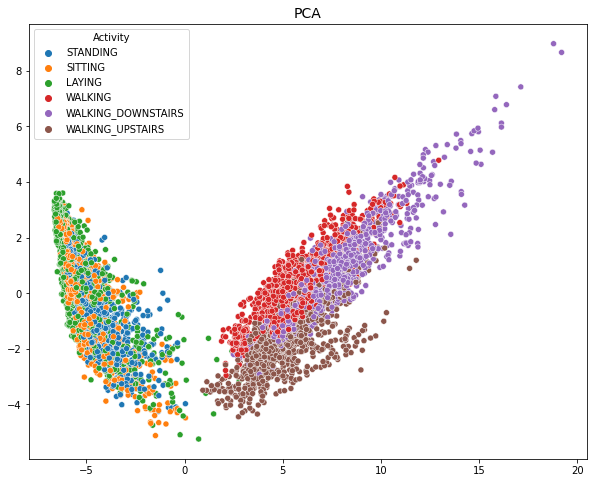

In [15]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=y)
plt.title('PCA', fontsize=14);

# t-SNE

In [16]:
from sklearn.manifold import TSNE

Алгоритм t-SNE представляет удобный элемент для визуализации данных. Алгоритм сохраняет локальную структуру данных (близкие элементы в многомерном пространстве останутся близкими при понижении размерности), но не глобальную, т.е. расстояния между образованными кластерами не имеют никакого реального значения.

In [32]:
%%time
tsne = TSNE(n_components=2, random_state=17)
x_tsne = tsne.fit_transform(x) # трансфомируем датасет

CPU times: user 4min 1s, sys: 5.5 s, total: 4min 6s
Wall time: 22.2 s


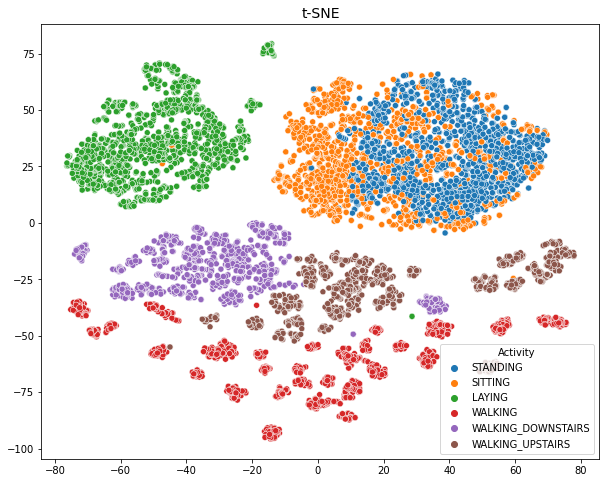

In [18]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_tsne[:,0], y=x_tsne[:,1], hue=y)
plt.title('t-SNE', fontsize=14);

t-SNE работает очень медленно с высокой размерностью и большим размером датасета, поэтому обычно хорошей практикой будет использовать сначала PCA для снижения размерности датасета.

In [19]:
pca = PCA(n_components=10, random_state=17) # установим процент сохраненной дисперсии равный 90%
x_reduced = pca.fit_transform(x) # трансформирует датасет

In [20]:
%%time
tsne = TSNE(n_components=2, random_state=17)
x_tsne = tsne.fit_transform(x_reduced)

CPU times: user 3min 56s, sys: 6.31 s, total: 4min 2s
Wall time: 21.2 s


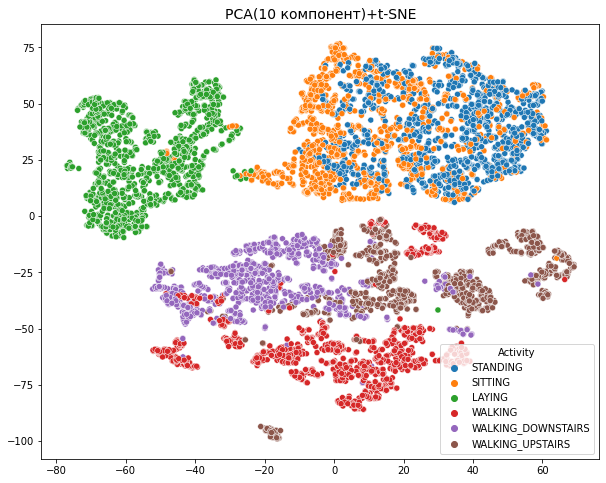

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_tsne[:,0], y=x_tsne[:,1], hue=y)
plt.title('PCA(10 компонент)+t-SNE', fontsize=14);

# UMAP

Алгоритм UMAP используется схоже с t-SNE для визуализации данных, но обычно он быстрее. Также алгоритм может использоваться для нелинейного понижения размерности (в отличие от PCA). Хорошее описание алгоритма с визуализацией его работы представлено в https://pair-code.github.io/understanding-umap/ от Google Research.

In [22]:
#!pip install umap-learn
import umap

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [27]:
%%time
transformer = umap.UMAP(n_neighbors=11, 
                 n_components=2, 
                 random_state=17, 
                 metric='euclidean')

x_umap = transformer.fit_transform(x)

CPU times: user 10.5 s, sys: 298 ms, total: 10.8 s
Wall time: 8.52 s


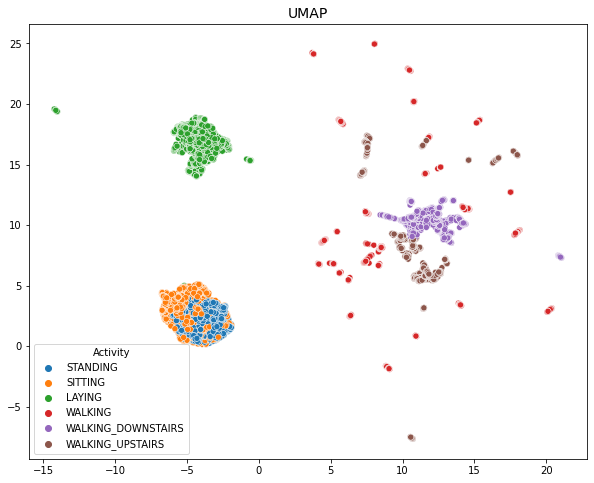

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_umap[:,0], y=x_umap[:,1], hue=y)
plt.title('UMAP', fontsize=14);

Попробуем этот алгоритм на данных пониженной размерности (10 компонент в нашем случае):

In [29]:
%%time
transformer = umap.UMAP(n_neighbors=11, 
                 n_components=2, 
                 random_state=17, 
                 metric='euclidean')

x_umap = transformer.fit_transform(x_reduced)

CPU times: user 9.27 s, sys: 212 ms, total: 9.48 s
Wall time: 8.07 s


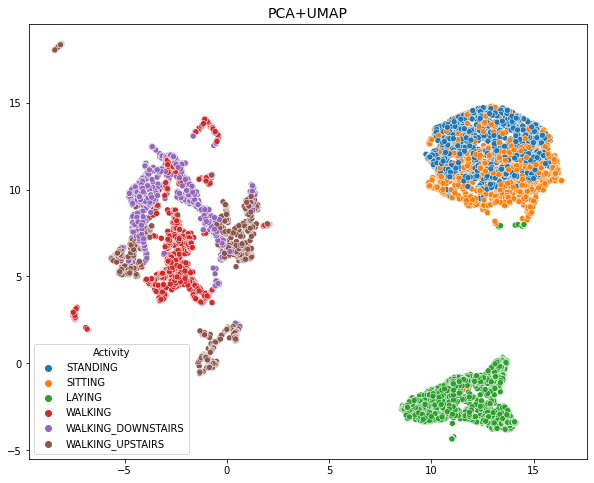

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_umap[:,0], y=x_umap[:,1], hue=y)
plt.title('PCA+UMAP', fontsize=14);

In [31]:
# Итоговое время работы каждого из алгоритмов
pd.DataFrame([0.1, 22.1, 21, 10.5, 9.2], 
             index = ['PCA', 't-SNE', 'PCA + t-SNE', 'UMAP', 'PCA + UMAP'], 
             columns=['Время работы алгоритма (сек)'])

,Время работы алгоритма (сек)
PCA,0.1
t-SNE,22.1
PCA + t-SNE,21.0
UMAP,10.5
PCA + UMAP,9.2


Мы рекомендуем самостоятельно попробовать разные параметры в алгоритмах t-SNE (например, perplexity, metric и др.) и UMAP (n_neighbors, metric, min_dist и др.) и посмотреть как при этом будет меняться визуализация кластеров.